In [1]:
import pandas as pd
df=pd.read_csv('income.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [3]:
df.income.value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [4]:
df= pd.concat([df.drop('occupation',axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')],axis=1)
df= pd.concat([df.drop('workclass',axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')],axis=1)
df=df.drop('education',axis=1)
df= pd.concat([df.drop('marital-status',axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')],axis=1)
df= pd.concat([df.drop('relationship',axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')],axis=1)
df= pd.concat([df.drop('race',axis=1), pd.get_dummies(df.race).add_prefix('race')],axis=1)
df= pd.concat([df.drop('native-country',axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')],axis=1)



In [5]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [6]:
df['gender']=df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income']=df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [7]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,0,30,0,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,1,0,0,20,0,False,True,...,False,False,False,False,False,False,False,True,False,False


In [8]:
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df['workclass'], prefix='workclass')], axis=1)

KeyError: "['workclass'] not found in axis"

<Axes: >

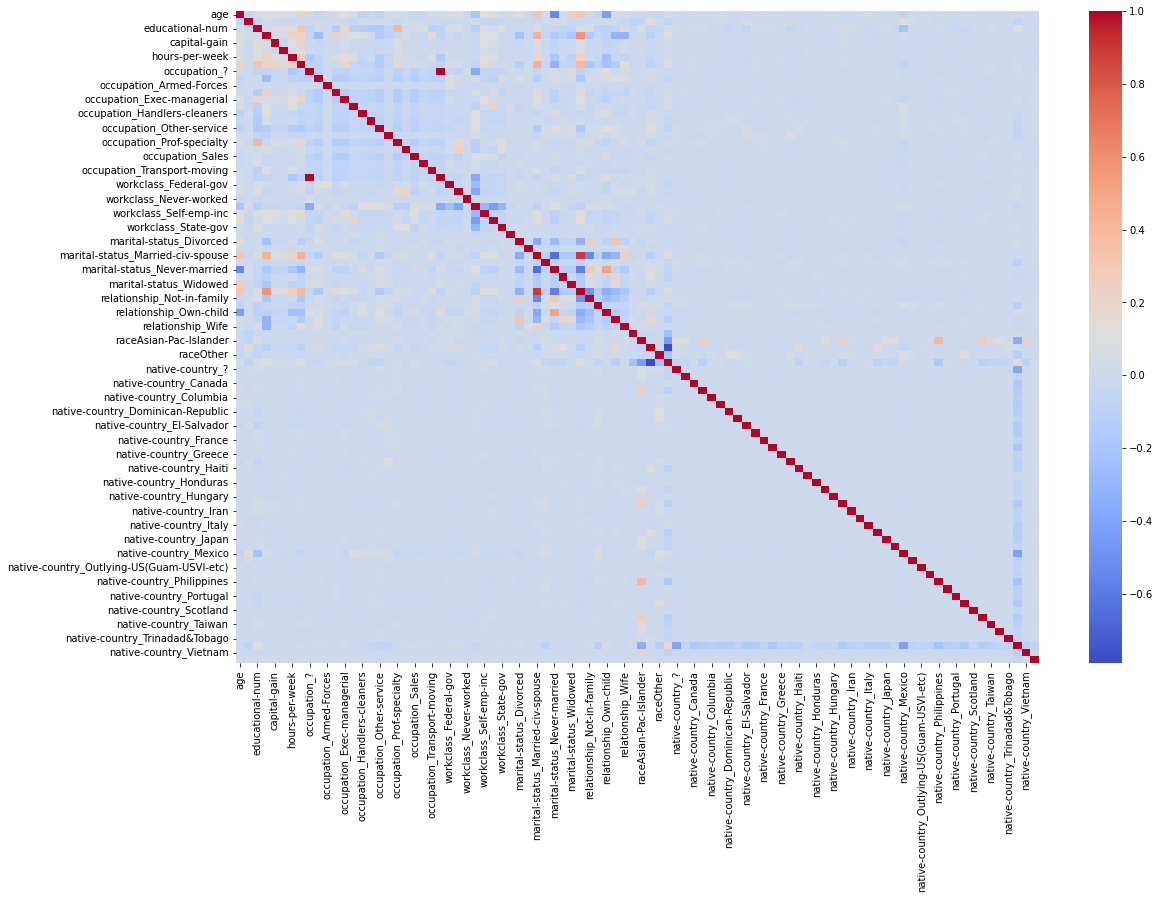

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=False,cmap='coolwarm')

In [ ]:
df.corr()

In [14]:
correlations=df.corr()['income'].abs()
sorted_correlations=correlations.sort_values()
num_cols_to_drop=int(0.8*len(df.columns))
cols_to_drop=sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped=df.drop(cols_to_drop,axis=1)
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

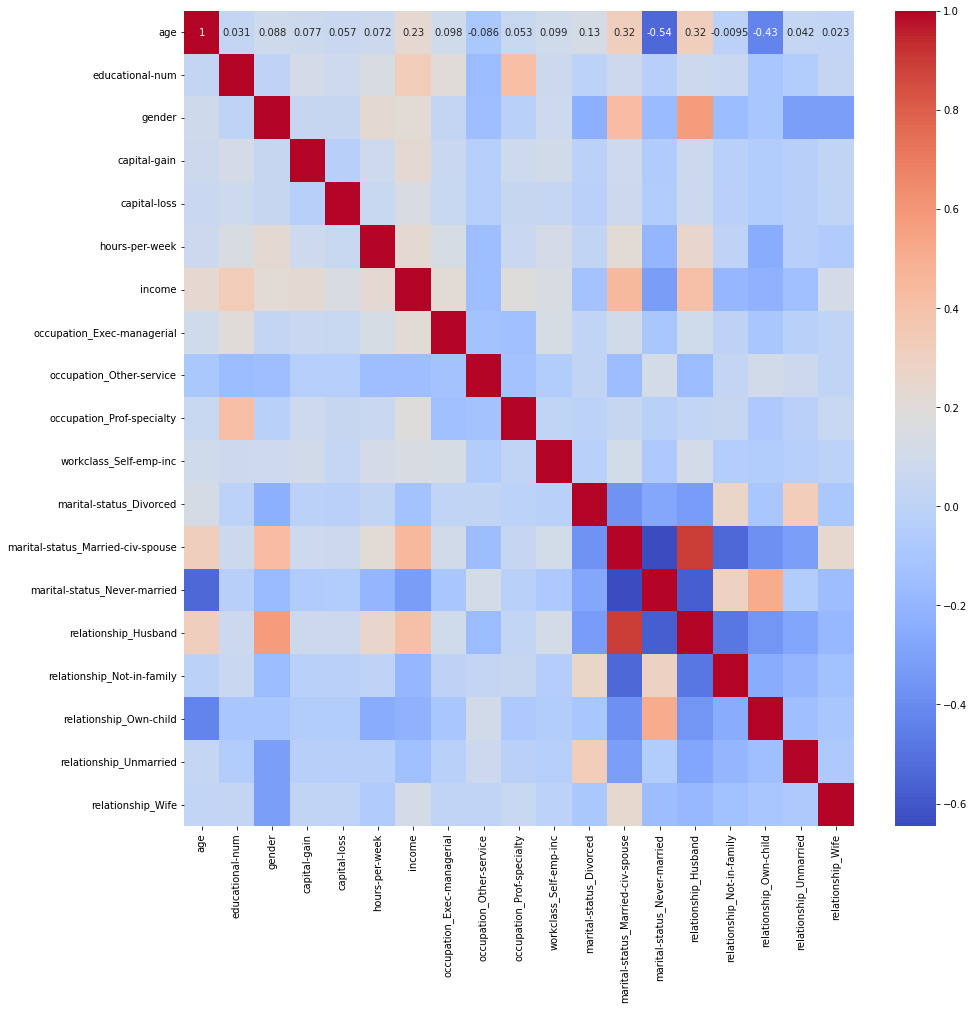

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df_dropped.corr(),annot=True,cmap='coolwarm')

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
df=df.drop('fnlwgt',axis=1)
train_df, test_df = train_test_split(df, test_size=0.2)
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
6512,40,9,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
39577,34,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31411,47,6,0,0,0,20,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
39693,41,9,0,0,0,60,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32626,68,9,0,0,0,10,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24617,59,9,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
38302,23,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
41034,39,10,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
41926,25,13,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
9533,27,14,1,0,0,37,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
23705,34,5,1,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
44115,20,10,1,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3023,46,9,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
16800,34,13,1,0,0,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31550,62,9,0,0,0,38,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5593,37,9,1,0,0,44,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
25521,26,9,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1355,37,10,1,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
train_X= train_df.drop('income',axis=1)
train_y=train_df['income']

test_X = test_df.drop('income',axis=1)
test_y = test_df['income']

forest=RandomForestClassifier()

forest.fit(train_X,train_y)

RandomForestClassifier()

In [36]:
forest.score(train_X,train_y)

0.9737926445371484

In [37]:
forest.feature_importances_

array([2.27847206e-01, 1.33165878e-01, 1.38574247e-02, 1.05142294e-01,
       3.37676338e-02, 1.14527754e-01, 2.31707560e-03, 4.83871640e-03,
       9.04874021e-05, 6.31106599e-03, 2.11421311e-02, 4.53098687e-03,
       3.75195486e-03, 4.18662682e-03, 8.56936764e-03, 2.08356352e-04,
       1.73385736e-02, 2.75956392e-03, 6.05420100e-03, 4.23684908e-03,
       4.07296374e-03, 1.63416861e-03, 4.90872070e-03, 5.29935866e-03,
       4.56321452e-09, 9.39067204e-03, 6.70915826e-03, 8.02801241e-03,
       4.14109023e-03, 1.50872166e-04, 6.73503345e-03, 3.00581474e-04,
       7.19010820e-02, 9.87192994e-04, 2.30786288e-02, 1.72827150e-03,
       1.81765046e-03, 5.06693095e-02, 1.09081799e-02, 1.82672872e-03,
       1.00540796e-02, 5.61430511e-03, 1.12854107e-02, 1.48718367e-03,
       3.16259684e-03, 4.96929670e-03, 9.29614093e-04, 6.19359222e-03,
       2.83214255e-03, 3.41105797e-04, 1.24901923e-03, 6.09559099e-04,
       1.99183662e-04, 8.23853235e-04, 3.08853663e-04, 1.27564810e-04,
      

In [38]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [39]:
importances=dict(zip(forest.feature_names_in_,forest.feature_importances_))
importances = {k:v for k,v in sorted(importances.items(),key=lambda x:x[1], reverse=True)}
importances

{'age': 0.227847206410056,
 'educational-num': 0.13316587794722884,
 'hours-per-week': 0.11452775364437924,
 'capital-gain': 0.10514229360370825,
 'marital-status_Married-civ-spouse': 0.07190108204657215,
 'relationship_Husband': 0.05066930954927387,
 'capital-loss': 0.03376763381152273,
 'marital-status_Never-married': 0.023078628799979132,
 'occupation_Exec-managerial': 0.02114213105940842,
 'occupation_Prof-specialty': 0.01733857364779996,
 'gender': 0.013857424658365642,
 'relationship_Wife': 0.011285410673446974,
 'relationship_Not-in-family': 0.01090817993513824,
 'relationship_Own-child': 0.010054079610768946,
 'workclass_Private': 0.00939067204125308,
 'occupation_Other-service': 0.008569367635823388,
 'workclass_Self-emp-not-inc': 0.008028012406579629,
 'marital-status_Divorced': 0.006735033453824631,
 'workclass_Self-emp-inc': 0.0067091582615881485,
 'occupation_Craft-repair': 0.006311065991037087,
 'raceWhite': 0.0061935922236703665,
 'native-country_United-States': 0.006162

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_estimators':[50,100,250],
    'max_depth':[5,10,30,None],
    'min_samples_split':[2,4],
    'max_features':['sqrt','log2']
}

grid_search=GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=param_grid,verbose=10)
grid_search.fit(train_X,train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.8s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.827 total time=   0.7s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.836 total time=   0.8s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.8s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [46]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=50)

In [47]:
forest=grid_search.best_estimator_
forest.score(test_X,test_y)

0.8649810625447846

In [61]:
importances=dict(zip(forest.feature_names_in_,forest.feature_importances_))
importances = {k:v for k,v in sorted(importances.items(),key=lambda x:x[1], reverse=True)}
importances

import pandas as pd

# Create a dictionary with new data
new_data = {
    'age': [30],
    'workclass': ['Private'],
    'marital-status': ['Married-civ-spouse'],
    'occupation': ['Tech-support'],
    'relationship': ['Husband'],
    'race': ['White'],
    'gender': ['Male'],
    'capital-gain': [0],
    'capital-loss': [0],
    'hours-per-week': [40],
    'native-country': ['United-States']
}

# Create a DataFrame from the new data
new_data_df = pd.DataFrame(new_data)

# Now you can use the trained RandomForestClassifier model to predict income for this new data
predicted_income = forest.predict(new_data_df)

# Print the predicted income
print(predicted_income)
